# **Fingerprint thinning**

In [ ]:
from KMM import KMM
from morphology import morphology_thinning
import numpy as np
from PIL import Image
import cv2
from IPython.display import display


In [11]:
def perform_thinning(
    path: str, 
    show_by_iterations: bool = False, 
    algorithm: str = 'KMM',
    show: bool = True,
    ) -> np.ndarray:
    
    algs = {
        'KMM': KMM,
        'morphology': morphology_thinning
    }
    
    if algorithm not in algs:
        raise ValueError(f"Unknown algorithm: {algorithm}. Available algorithms: {list(algs.keys())}")

    alg = algs[algorithm]
    farray = read_bmp(path)
    
    skeleton = alg(farray, show=show_by_iterations)

    if show:
        img_skeleton = skeleton.copy()
        img_skeleton[skeleton == 0] = 255
        img_skeleton[skeleton == 1] = 0


        img_skeleton = img_skeleton.astype(np.uint8)
        img = Image.fromarray(img_skeleton)
        display(img)    
    return skeleton

    
def read_bmp(path: str) -> np.ndarray:
    image = Image.open(path)
    image_np = np.array(image)
    _, farray = cv2.threshold(image_np, 127, 255, cv2.THRESH_BINARY)
    if farray.ndim == 3:
        farray = farray[:, :, 0]
    return farray

# **Example**

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8


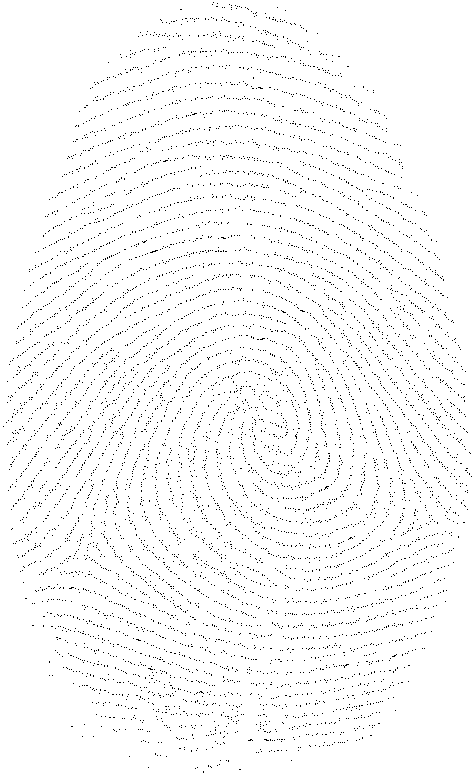

In [15]:
tester = 'test_data/tester.bmp'
skeleton = perform_thinning(path=tester, 
                            show_by_iterations=False,
                            show=True, 
                            algorithm='KMM')